# **Case Study: How Does a Bike-Share Navigate Speedy Success?**

Author: Piyush Verma

Date: 23/06/2024

This is my first case study, where I will employ the guidelines from the Google Data Analytics Certificate: Ask, Prepare, Process, Analyze, Share and Act, to complete this assignment.

This assignment is a part of the Google Data Analytics Certificate.

### **Scenario**

I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members.

### **Characters and Teams**

1. Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also featuring reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. 

2. Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

3. Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals—as well as how I, as a junior data analyst, can help Cyclistic achieve them.

4. Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### **About the Company**

In 2016, Cyclistic launched a successful bike-share rental. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, The director of marketing believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, she believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.


### **Goal**

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

The director of marketing has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently? 

In this assignment, I will produce a report with the following deliverables:
1. A clear statement of the business task
2. Documentation of any cleaning or manipulation of data
3. A summary of my analysis
4. Supporting visualizations and key findings

## **ASK**

1. What is the problem I am trying to solve?
2. How will my insights drive business decisions?
3. Who are the stakeholders?
4. How is the data collected?
5. What are the timing and target audience for the company's marketing campaigns?

## **Business Statement**

**As a data analyst, my task is to identify trends and patterns among casual riders and membership riders to maximize the number of annual memberships. By analyzing this data, I aim to identify potential riders who would benefit from an annual membership. It is important to note that raising awareness of the annual membership program among casual riders is not necessary, as they are already aware of it.**

# **PREPARE**

1. The data is organized into CSV files, with each file representing a month's worth of data.
2. ROCCC criteria is checked and fulfilled.
3. Licensing, privacy, security, and accessibility has been noted and informed.

## **IMPORTANT**

Since Cyclistic is a fictional company, I will use Divvy’s, a bike-share program based in Chicago, data from May 2023 – April 2024 to complete this case study. To download the data, please use [this link](http://divvy-tripdata.s3.amazonaws.com/index.html). This data was made public by Motivate International Inc, under [this license](http://www.divvybikes.com/data-license-agreement). Due to data privacy issues, personal information has been removed or encrypted. This means that I won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)
library(tidyr)
library(geosphere)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


1. **tidyverse**: 
   The `tidyverse` is a collection of R packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures. It includes packages like `ggplot2`, `dplyr`, `tidyr`, `readr`, `purrr`, and `tibble`. Using `tidyverse` simplifies the process of data manipulation, visualization, and analysis.

2. **lubridate**:
   The `lubridate` package makes it easier to work with dates and times in R. It provides functions to parse dates, extract and modify components of a date-time, perform arithmetic operations on dates, and handle time zones. It helps in dealing with date-time data more intuitively and efficiently.

3. **ggplot2**:
   `ggplot2` is a powerful and widely-used data visualization package in R. It allows you to create complex and multi-layered graphics using a consistent and expressive grammar of graphics. It enables you to create high-quality plots with fine control over aesthetics, themes, and other graphical parameters.

4. **dplyr**:
   The `dplyr` package is designed for data manipulation and transformation. It provides a set of functions (verbs) that help you select, filter, arrange, summarize, and mutate data frames in a concise and readable way. It is particularly known for its chaining or piping functionality, which allows for cleaner and more efficient data manipulation workflows.

5. **tidyr**:
   `tidyr` helps in cleaning and tidying data. It provides functions to reshape and reorganize data into a tidy format, where each variable is a column, each observation is a row, and each type of observational unit forms a table. Key functions include `gather`, `spread`, `separate`, and `unite`, which help transform data between wide and long formats and handle nested or complex data structures.

6. **Geosphere**: 
The `geosphere` package in R provides functions for geographic calculations and spatial data analysis. It allows users to compute distances, areas, and other geometric properties for data points defined by latitude and longitude. Key functionalities include calculating the shortest path between points on the Earth's surface, finding midpoints, and determining the area of polygons. This package is particularly useful for geospatial analysis and mapping applications.

Now, we will read the trip data collected over the past 12 months, from May 2023 to April 2024.

In [2]:
tripdata_2023_05 <- read.csv("Data/202305-divvy-tripdata.csv")
tripdata_2023_06 <- read.csv("Data/202306-divvy-tripdata.csv")
tripdata_2023_07 <- read.csv("Data/202307-divvy-tripdata.csv")
tripdata_2023_08 <- read.csv("Data/202308-divvy-tripdata.csv")
tripdata_2023_09 <- read.csv("Data/202309-divvy-tripdata.csv")
tripdata_2023_10 <- read.csv("Data/202310-divvy-tripdata.csv")
tripdata_2023_11 <- read.csv("Data/202311-divvy-tripdata.csv")
tripdata_2023_12 <- read.csv("Data/202312-divvy-tripdata.csv")
tripdata_2024_01 <- read.csv("Data/202401-divvy-tripdata.csv")
tripdata_2024_02 <- read.csv("Data/202402-divvy-tripdata.csv")
tripdata_2024_03 <- read.csv("Data/202403-divvy-tripdata.csv")
tripdata_2024_04 <- read.csv("Data/202404-divvy-tripdata.csv")

## **Cleaning Data**

1. Verifying column names and data types to ensure consistency and usability.

In [3]:
print("May 2023")
str(tripdata_2023_05)

print("June 2023")
str(tripdata_2023_06)

print("July 2023")
str(tripdata_2023_07)

print("August 2023")
str(tripdata_2023_08)

print("September 2023")
str(tripdata_2023_09)

print("October 2023")
str(tripdata_2023_10)

print("November 2023")
str(tripdata_2023_11)

print("December 2024")
str(tripdata_2023_12)

print("January 2024")
str(tripdata_2024_01)

print("February 2024")
str(tripdata_2024_02)

print("March 2024")
str(tripdata_2024_03)

print("April 2023")
str(tripdata_2024_04)

[1] "May 2023"
'data.frame':	604827 obs. of  13 variables:
 $ ride_id           : chr  "0D9FA920C3062031" "92485E5FB5888ACD" "FB144B3FC8300187" "DDEB93BC2CE9AA77" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-05-07 19:53:48" "2023-05-06 18:54:08" "2023-05-21 00:40:21" "2023-05-10 16:47:01" ...
 $ ended_at          : chr  "2023-05-07 19:58:32" "2023-05-06 19:03:35" "2023-05-21 00:44:36" "2023-05-10 16:59:52" ...
 $ start_station_name: chr  "Southport Ave & Belmont Ave" "Southport Ave & Belmont Ave" "Halsted St & 21st St" "Carpenter St & Huron St" ...
 $ start_station_id  : chr  "13229" "13229" "13162" "13196" ...
 $ end_station_name  : chr  "" "" "" "Damen Ave & Cortland St" ...
 $ end_station_id    : chr  "" "" "" "13133" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 42 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ 

'data.frame':	537113 obs. of  13 variables:
 $ ride_id           : chr  "4449097279F8BBE7" "9CF060543CA7B439" "667F21F4D6BDE69C" "F92714CC6B019B96" ...
 $ rideable_type     : chr  "classic_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-10-08 10:36:26" "2023-10-11 17:23:59" "2023-10-12 07:02:33" "2023-10-24 19:13:03" ...
 $ ended_at          : chr  "2023-10-08 10:49:19" "2023-10-11 17:36:08" "2023-10-12 07:06:53" "2023-10-24 19:18:29" ...
 $ start_station_name: chr  "Orleans St & Chestnut St (NEXT Apts)" "Desplaines St & Kinzie St" "Orleans St & Chestnut St (NEXT Apts)" "Desplaines St & Kinzie St" ...
 $ start_station_id  : chr  "620" "TA1306000003" "620" "TA1306000003" ...
 $ end_station_name  : chr  "Sheffield Ave & Webster Ave" "Sheffield Ave & Webster Ave" "Franklin St & Lake St" "Franklin St & Lake St" ...
 $ end_station_id    : chr  "TA1309000033" "TA1309000033" "TA1307000111" "TA1307000111" ...
 $ start_lat         : num  41.9 41.9 41.9

2. Consolidating data from all 12 months into a unified data frame.

In [4]:
year_trips_all <- bind_rows(tripdata_2023_05, tripdata_2023_06, tripdata_2023_07, tripdata_2023_08, tripdata_2023_09, tripdata_2023_10, tripdata_2023_11, tripdata_2023_12, tripdata_2024_01, tripdata_2024_02, tripdata_2024_03, tripdata_2024_04)
summary(year_trips_all)

   ride_id          rideable_type       started_at          ended_at        
 Length:5738612     Length:5738612     Length:5738612     Length:5738612    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5738612     Length:5738612     Length:5738612     Length:5738612    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

3. Removing columns with no importance for analysis such as start station and end station name and id.

In [5]:
year_trips <- year_trips_all[, c("ride_id", "rideable_type", "started_at", "ended_at", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual")]
summary(year_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5738612     Length:5738612     Length:5738612     Length:5738612    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   start_lat       start_lng         end_lat         end_lng      
 Min.   :41.63   Min.   :-87.94   Min.   : 0.00   Min.   :-88.16  
 1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88   1st Qu.:-87.66  
 Median :41.90   Median :-87.64   Median :41.90   Median :-87.64  
 Mean   :41.90   Mean   :-87.65   Mean   :41.90   Mean   :-87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93  

4. Remove duplicated ID as confirmed ride ID is associated with each ride, not riders.
5. Remove "docked_bike" in rideable_type as it has no meaning to our analysis.

In [6]:
year_trips <- year_trips[!duplicated(year_trips$ride_id), ]
year_trips <- subset(year_trips, rideable_type != "docked_bike")
summary(year_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5676165     Length:5676165     Length:5676165     Length:5676165    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   start_lat       start_lng         end_lat         end_lng      
 Min.   :41.63   Min.   :-87.94   Min.   : 0.00   Min.   :-88.16  
 1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88   1st Qu.:-87.66  
 Median :41.90   Median :-87.64   Median :41.90   Median :-87.64  
 Mean   :41.90   Mean   :-87.65   Mean   :41.90   Mean   :-87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93  

5. Deleting rows with na values.

In [7]:
year_trips <- drop_na(year_trips)
summary(year_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5670315     Length:5670315     Length:5670315     Length:5670315    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   start_lat       start_lng         end_lat         end_lng      
 Min.   :41.63   Min.   :-87.94   Min.   : 0.00   Min.   :-88.16  
 1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88   1st Qu.:-87.66  
 Median :41.90   Median :-87.64   Median :41.90   Median :-87.64  
 Mean   :41.90   Mean   :-87.65   Mean   :41.90   Mean   :-87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93   3rd Qu.:-87.63  
 Max.   :42.07   Max.   :-87.46   Max.   :42.18   Max.   : 

Number of rows decreased from 5738612 to 5670315 (decrease of 1.2%).

# **PROCESS**

In [8]:
dim(year_trips)
head(year_trips)
str(year_trips)

[1] 5670315       9

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,41.93941,-87.66383,41.93000,-87.65000,member
2,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,41.93948,-87.66385,41.94000,-87.69000,member
3,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,41.85379,-87.64672,41.86000,-87.65000,member
4,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,41.89456,-87.65345,41.91598,-87.67733,member
5,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,41.95708,-87.66420,41.93948,-87.66375,member
6,2BA66385DF8F815A,classic_bike,2023-05-30 15:01:21,2023-05-30 15:17:00,41.88275,-87.64119,41.89259,-87.61729,member


'data.frame':	5670315 obs. of  9 variables:
 $ ride_id      : chr  "0D9FA920C3062031" "92485E5FB5888ACD" "FB144B3FC8300187" "DDEB93BC2CE9AA77" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at   : chr  "2023-05-07 19:53:48" "2023-05-06 18:54:08" "2023-05-21 00:40:21" "2023-05-10 16:47:01" ...
 $ ended_at     : chr  "2023-05-07 19:58:32" "2023-05-06 19:03:35" "2023-05-21 00:44:36" "2023-05-10 16:59:52" ...
 $ start_lat    : num  41.9 41.9 41.9 41.9 42 ...
 $ start_lng    : num  -87.7 -87.7 -87.6 -87.7 -87.7 ...
 $ end_lat      : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng      : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ member_casual: chr  "member" "member" "member" "member" ...


1. Splitting the data set into 3 parts for computational stability.

In [9]:
y1 <- year_trips[1:2000000, ]
y2 <- year_trips[2000001:3750000, ]
y3 <- year_trips[3750001:5670315, ]

2. Adding new columns for date, month, day and year.

In [10]:
y1 <- y1 %>%
  mutate(
    date = as.Date(started_at),
    month = format(as.Date(started_at), "%m"),
    day = format(as.Date(started_at), "%d"),
    year = format(as.Date(started_at), "%Y"),
    day_of_week = format(as.Date(started_at), "%A")
  )

In [11]:
y2 <- y2 %>%
  mutate(
    date = as.Date(started_at),
    month = format(as.Date(started_at), "%m"),
    day = format(as.Date(started_at), "%d"),
    year = format(as.Date(started_at), "%Y"),
    day_of_week = format(as.Date(started_at), "%A")
  )

In [12]:
y3 <- y3 %>%
  mutate(
    date = as.Date(started_at),
    month = format(as.Date(started_at), "%m"),
    day = format(as.Date(started_at), "%d"),
    year = format(as.Date(started_at), "%Y"),
    day_of_week = format(as.Date(started_at), "%A")
  )

In [13]:
year_trips <- bind_rows(y1, y2, y3)
head(year_trips)
str(year_trips)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
1,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,41.93941,-87.66383,41.93000,-87.65000,member,2023-05-07,05,07,2023,Sunday
2,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,41.93948,-87.66385,41.94000,-87.69000,member,2023-05-06,05,06,2023,Saturday
3,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,41.85379,-87.64672,41.86000,-87.65000,member,2023-05-21,05,21,2023,Sunday
4,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,41.89456,-87.65345,41.91598,-87.67733,member,2023-05-10,05,10,2023,Wednesday
5,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,41.95708,-87.66420,41.93948,-87.66375,member,2023-05-09,05,09,2023,Tuesday
6,2BA66385DF8F815A,classic_bike,2023-05-30 15:01:21,2023-05-30 15:17:00,41.88275,-87.64119,41.89259,-87.61729,member,2023-05-30,05,30,2023,Tuesday


'data.frame':	5670315 obs. of  14 variables:
 $ ride_id      : chr  "0D9FA920C3062031" "92485E5FB5888ACD" "FB144B3FC8300187" "DDEB93BC2CE9AA77" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at   : chr  "2023-05-07 19:53:48" "2023-05-06 18:54:08" "2023-05-21 00:40:21" "2023-05-10 16:47:01" ...
 $ ended_at     : chr  "2023-05-07 19:58:32" "2023-05-06 19:03:35" "2023-05-21 00:44:36" "2023-05-10 16:59:52" ...
 $ start_lat    : num  41.9 41.9 41.9 41.9 42 ...
 $ start_lng    : num  -87.7 -87.7 -87.6 -87.7 -87.7 ...
 $ end_lat      : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng      : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ member_casual: chr  "member" "member" "member" "member" ...
 $ date         : Date, format: "2023-05-07" "2023-05-06" ...
 $ month        : chr  "05" "05" "05" "05" ...
 $ day          : chr  "07" "06" "21" "10" ...
 $ year         : chr  "2023" "2023" "2023" "2023" ...
 $ day_of_week  : chr  "Sunday" "Saturday"

3. Calculating ride length of each trip.

In [14]:
year_trips$ride_length <- difftime(year_trips$ended_at, year_trips$started_at)

4. Converting ride length from Double to numeric so we can run calculations on the data.

In [15]:
year_trips$ride_length <- as.numeric(as.character(year_trips$ride_length))

4. Remove trips if ride length is less than 0 second and is > 1440 minutes as ride length shouldn't be either negative or more than one day.

In [16]:
year_trips <- year_trips[!(year_trips$ride_length <= 0 | year_trips$ride_length > 1440),]

In [17]:
dim(year_trips) 
head(year_trips)
summary(year_trips)

[1] 4876486      15

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,41.93941,-87.66383,41.93000,-87.65000,member,2023-05-07,05,07,2023,Sunday,284
2,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,41.93948,-87.66385,41.94000,-87.69000,member,2023-05-06,05,06,2023,Saturday,567
3,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,41.85379,-87.64672,41.86000,-87.65000,member,2023-05-21,05,21,2023,Sunday,255
4,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,41.89456,-87.65345,41.91598,-87.67733,member,2023-05-10,05,10,2023,Wednesday,771
5,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,41.95708,-87.66420,41.93948,-87.66375,member,2023-05-09,05,09,2023,Tuesday,534
6,2BA66385DF8F815A,classic_bike,2023-05-30 15:01:21,2023-05-30 15:17:00,41.88275,-87.64119,41.89259,-87.61729,member,2023-05-30,05,30,2023,Tuesday,939


   ride_id          rideable_type       started_at          ended_at        
 Length:4876486     Length:4876486     Length:4876486     Length:4876486    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   start_lat       start_lng         end_lat         end_lng      
 Min.   :41.64   Min.   :-87.92   Min.   : 0.00   Min.   :-87.99  
 1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88   1st Qu.:-87.66  
 Median :41.90   Median :-87.64   Median :41.90   Median :-87.65  
 Mean   :41.90   Mean   :-87.65   Mean   :41.90   Mean   :-87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93   3rd Qu.:-87.63  
 Max.   :42.07   Max.   :-87.52   Max.   :42.09   Max.   : 

Number of rows decreased from 5731002 to 4901309 (decrease of 14.5%).

6. Calculating the ride distance for each ride.

In [18]:
year_trips$ride_distance <- distGeo(matrix(c(year_trips$start_lng, year_trips$start_lat), ncol = 2), matrix(c(year_trips$end_lng, year_trips$end_lat), ncol = 2))
str(year_trips)

'data.frame':	4876486 obs. of  16 variables:
 $ ride_id      : chr  "0D9FA920C3062031" "92485E5FB5888ACD" "FB144B3FC8300187" "DDEB93BC2CE9AA77" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at   : chr  "2023-05-07 19:53:48" "2023-05-06 18:54:08" "2023-05-21 00:40:21" "2023-05-10 16:47:01" ...
 $ ended_at     : chr  "2023-05-07 19:58:32" "2023-05-06 19:03:35" "2023-05-21 00:44:36" "2023-05-10 16:59:52" ...
 $ start_lat    : num  41.9 41.9 41.9 41.9 42 ...
 $ start_lng    : num  -87.7 -87.7 -87.6 -87.7 -87.7 ...
 $ end_lat      : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng      : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ member_casual: chr  "member" "member" "member" "member" ...
 $ date         : Date, format: "2023-05-07" "2023-05-06" ...
 $ month        : chr  "05" "05" "05" "05" ...
 $ day          : chr  "07" "06" "21" "10" ...
 $ year         : chr  "2023" "2023" "2023" "2023" ...
 $ day_of_week  : chr  "Sunday" "Saturday"

# **ANALYSE**

In [19]:
year_trips$day_of_week <- 
    ordered(year_trips$day_of_week, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

In [20]:
year_trips %>%
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_ride = n(), .groups = 'drop') %>%
  arrange(day_of_week)

member_casual,day_of_week,number_of_ride
<chr>,<ord>,<int>
casual,Monday,185276
member,Monday,469619
casual,Tuesday,196801
member,Tuesday,532722
casual,Wednesday,196864
member,Wednesday,534721
casual,Thursday,212058
member,Thursday,539987
casual,Friday,232067


In [21]:
year_trips$month <-
    ordered(year_trips$month, levels = c('05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04'))

In [22]:
year_trips %>%
  group_by(member_casual, month) %>%
  summarise(number_of_ride = n(), .groups = 'drop') %>%
  arrange(month)

member_casual,month,number_of_ride
<chr>,<ord>,<int>
casual,05,169558
member,05,330358
casual,06,221487
member,06,371516
casual,07,237303
member,07,384212
casual,08,229117
member,08,407410
casual,09,199955


1. Casual riders are more likely to take a ride on weekend while membership riders use on weekday more often.
2. May - September is the peak season for both rider types

In [23]:
year_trips %>%
  group_by(member_casual, day_of_week) %>%
  summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
  arrange(day_of_week)

member_casual,day_of_week,average_ride_length
<chr>,<ord>,<dbl>
casual,Monday,596.1036
member,Monday,527.3598
casual,Tuesday,589.8352
member,Tuesday,536.7515
casual,Wednesday,581.6803
member,Wednesday,534.6693
casual,Thursday,586.5485
member,Thursday,535.8985
casual,Friday,606.8912


In [24]:
year_trips %>%
  group_by(member_casual, month) %>%
  summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
  arrange(month)

member_casual,month,average_ride_length
<chr>,<ord>,<dbl>
casual,05,618.6068
member,05,546.9639
casual,06,634.6084
member,06,565.3517
casual,07,640.4746
member,07,568.9413
casual,08,637.6936
member,08,570.0250
casual,09,627.1094


1. Membership rider's trip is shorter than casual ones regardless of the season or day.
2. All users take longer year_trips over weekend and through the months of May-Septemeber.

In [25]:
year_trips %>%
  group_by(member_casual, day_of_week) %>%
  summarise(distance_of_ride = mean(ride_distance), .groups = 'drop') %>%
  arrange(day_of_week)

member_casual,day_of_week,distance_of_ride
<chr>,<ord>,<dbl>
casual,Monday,1698.032
member,Monday,1775.626
casual,Tuesday,1748.986
member,Tuesday,1817.093
casual,Wednesday,1750.422
member,Wednesday,1814.022
casual,Thursday,1794.773
member,Thursday,1831.281
casual,Friday,1724.337


In [26]:
year_trips %>%
  group_by(member_casual, month) %>%
  summarise(distance_of_ride = mean(ride_distance), .groups = 'drop') %>%
  arrange(month)

member_casual,month,distance_of_ride
<chr>,<ord>,<dbl>
casual,05,1761.072
member,05,1842.595
casual,06,1851.848
member,06,1920.028
casual,07,1780.281
member,07,1884.293
casual,08,1791.439
member,08,1872.076
casual,09,1762.440


1. While Casual rider has slightly longer distance trip on weekday, membership ride's slighly longer over weekend.
2. All users take slightly longer distance trip in Spring

In [27]:
year_trips %>%
  group_by(member_casual) %>%
  summarize(number_of_rides = n(), .groups = 'drop')

member_casual,number_of_rides
<chr>,<int>
casual,1555485
member,3321001


Members take up almost 68% of the total rides in a year.

In [28]:
year_trips %>%
  group_by(member_casual) %>%
  filter(ride_distance < 1) %>%
  summarize(number_of_rides = n() , .groups = 'drop')

member_casual,number_of_rides
<chr>,<int>
casual,98425
member,108981


While 6.4% of casual riders return their bike to their start point station, 3.3% of membership rider returns at their start point station. 

# SHARE

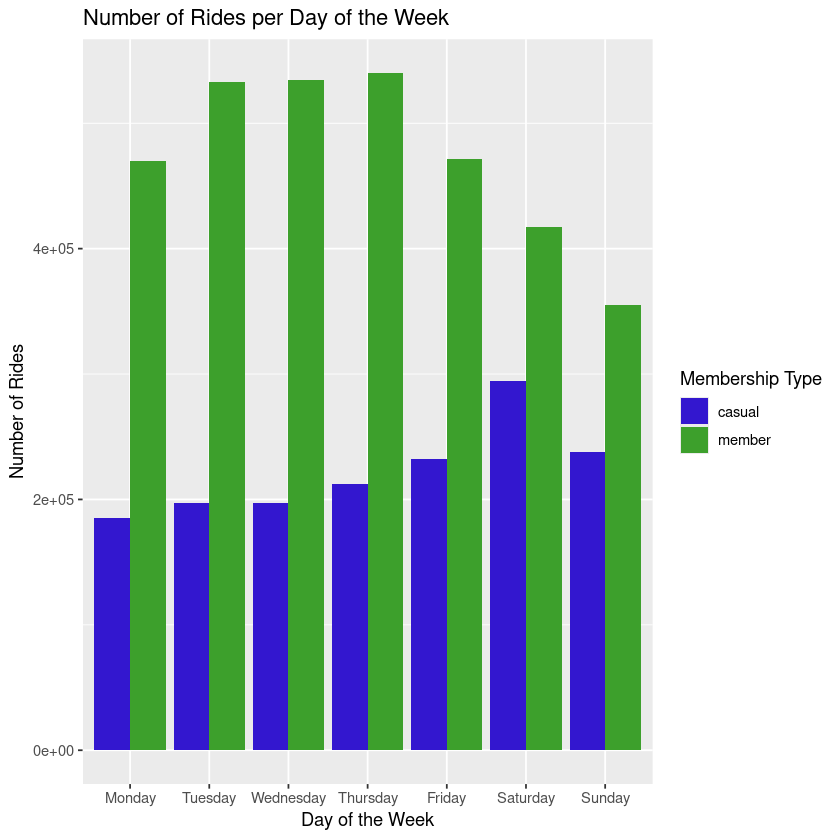

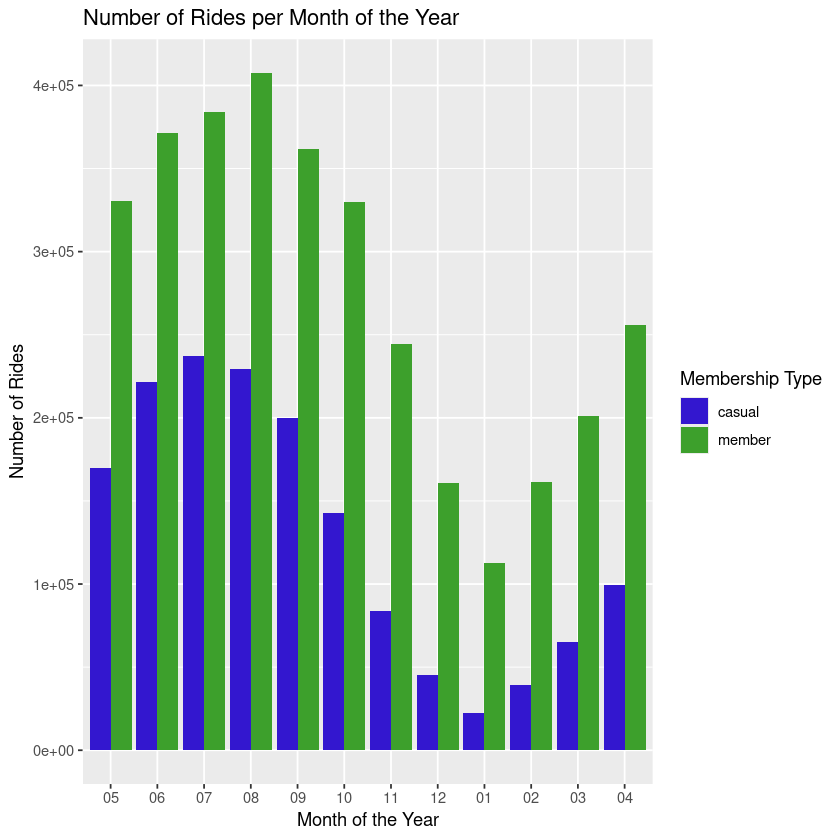

In [29]:
year_trips %>%
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_rides = n(), .groups = 'drop') %>%
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Number of Rides per Day of the Week", x = "Day of the Week", y = "Number of Rides", fill = "Membership Type") +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf"))

year_trips %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(), .groups = 'drop') %>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Number of Rides per Month of the Year", x = "Month of the Year", y = "Number of Rides", fill = "Membership Type") +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf"))

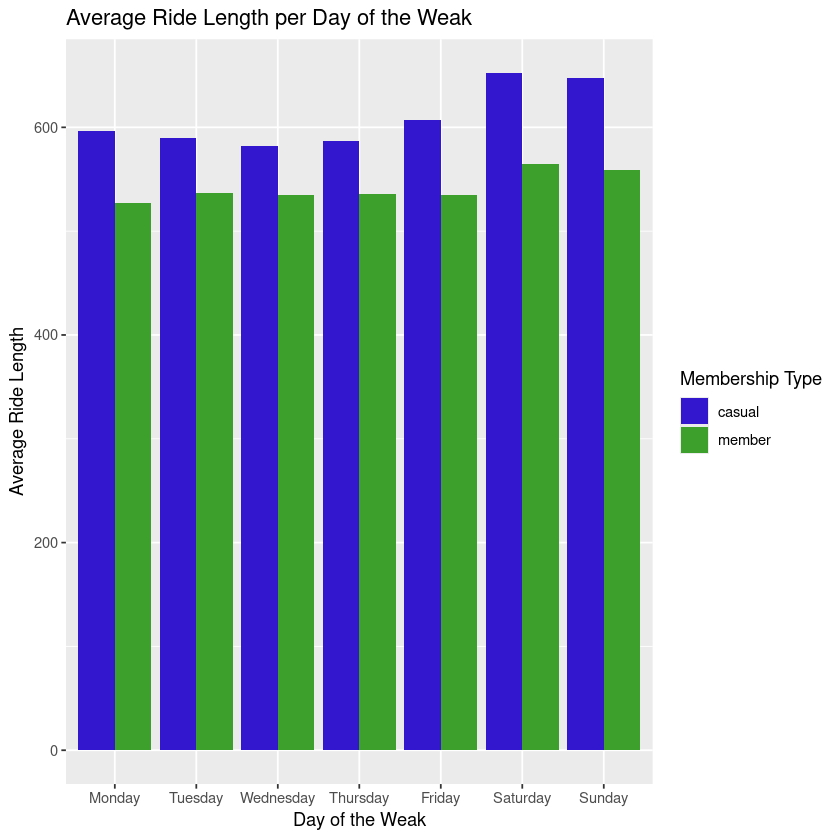

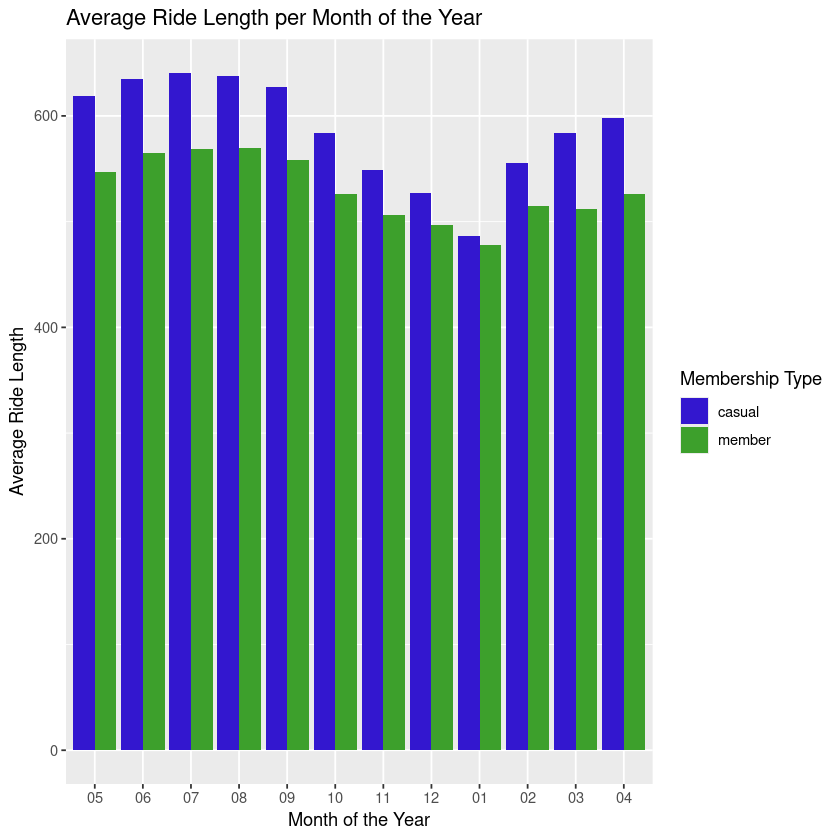

In [30]:
year_trips %>%
  group_by(member_casual, day_of_week) %>%
  summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
  ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) + 
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Average Ride Length per Day of the Weak", x = "Day of the Weak", y = "Average Ride Length", fill = "Membership Type") +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf"))

year_trips %>%
  group_by(member_casual, month) %>%
  summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
  ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) + 
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Average Ride Length per Month of the Year", x = "Month of the Year", y = "Average Ride Length", fill = "Membership Type") +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf"))

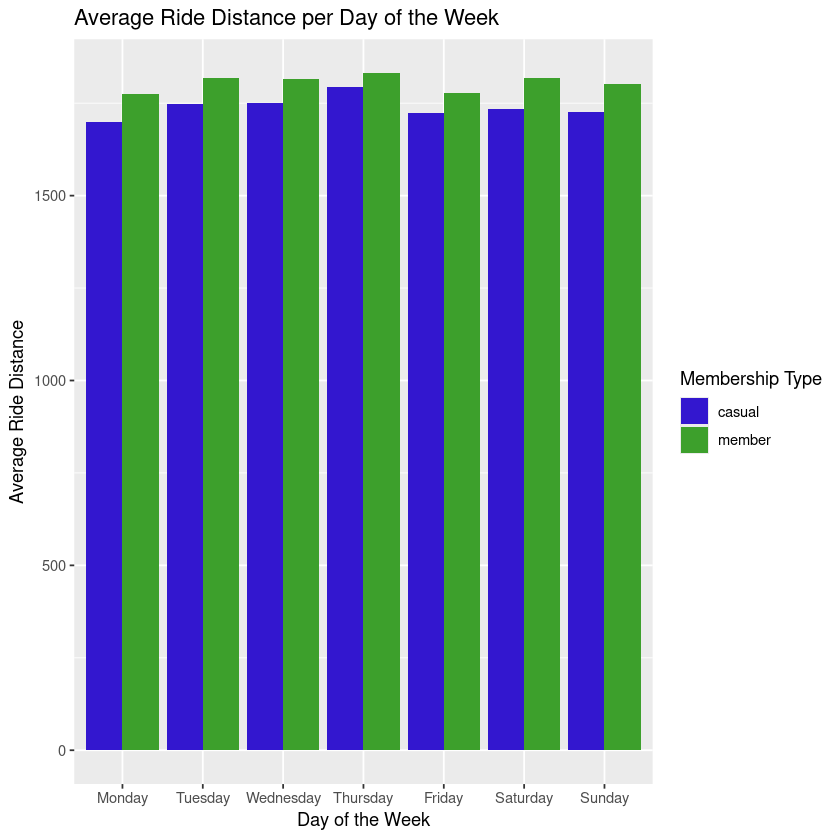

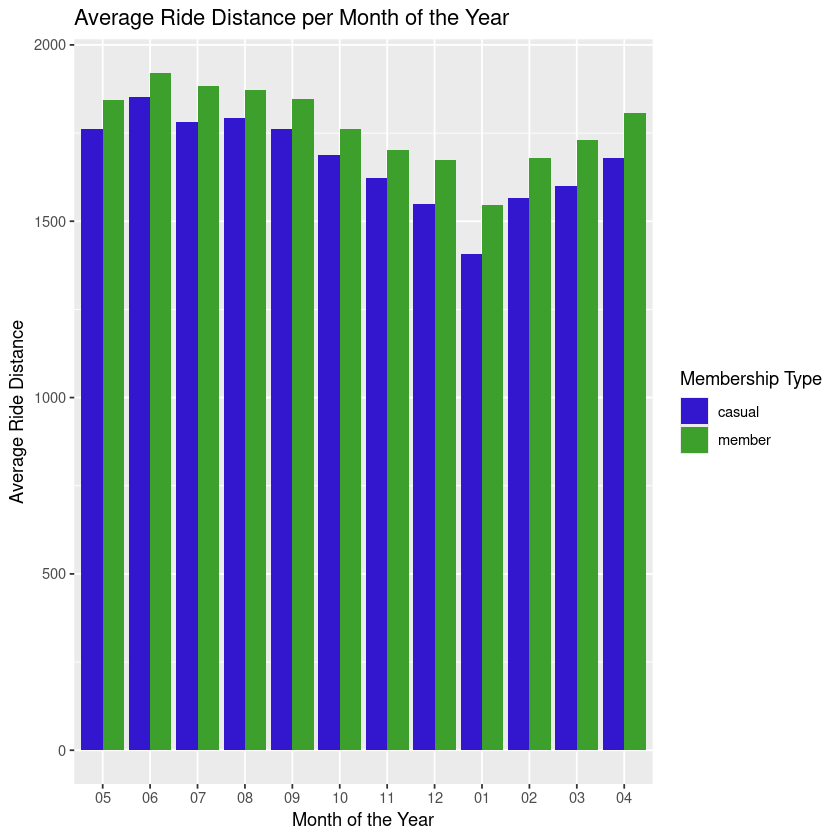

In [31]:
year_trips %>%
  group_by(member_casual, day_of_week) %>%
  summarise(avg_ride_distance = mean(ride_distance), .groups = 'drop') %>%
  ggplot(aes(x = day_of_week, y = avg_ride_distance, fill = member_casual)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Average Ride Distance per Day of the Week", x = "Day of the Week", y = "Average Ride Distance", fill = "Membership Type") +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf"))

year_trips %>%
  group_by(member_casual, month) %>%
  summarise(avg_ride_distance = mean(ride_distance), .groups = 'drop') %>%
  ggplot(aes(x = month, y = avg_ride_distance, fill = member_casual)) + 
  geom_bar(position = "dodge", stat = "identity") +
  labs(title = "Average Ride Distance per Month of the Year", x = "Month of the Year", y = "Average Ride Distance", fill = "Membership Type") +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf"))

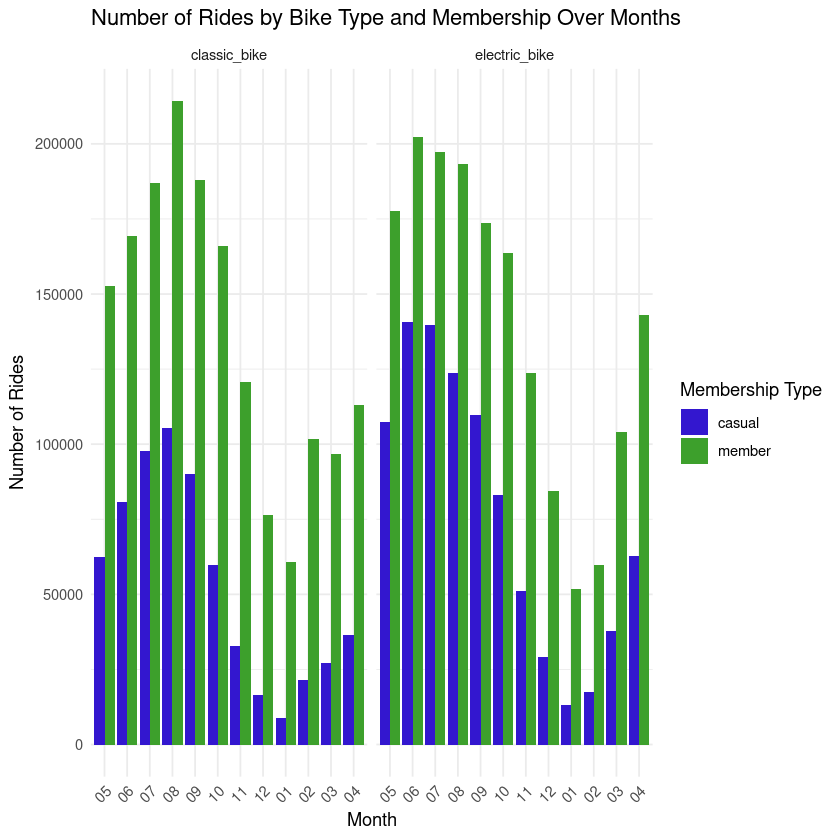

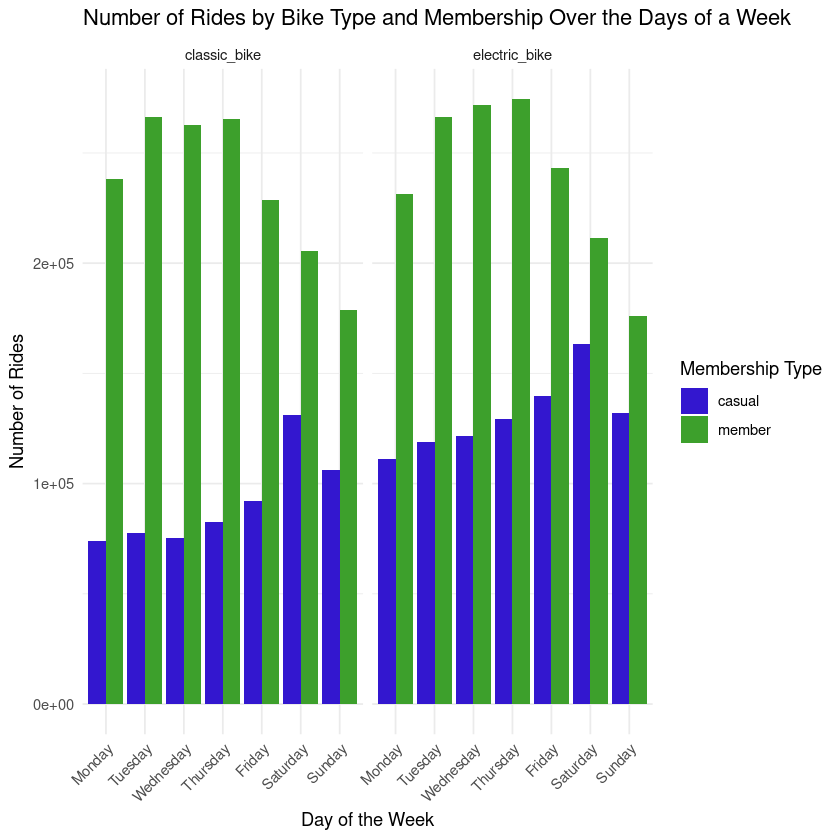

In [32]:
year_trips %>%
  group_by(month, rideable_type, member_casual) %>%
  summarise(number_of_rides = n(), .groups = 'drop') %>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_bar(position = "dodge", stat = "identity") +
  facet_wrap(~ rideable_type) +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf")) +
  labs(title = "Number of Rides by Bike Type and Membership Over Months",
       x = "Month",
       y = "Number of Rides",
       fill = "Membership Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

year_trips %>%
  group_by(day_of_week, rideable_type, member_casual) %>%
  summarise(number_of_rides = n(), .groups = 'drop') %>%
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_bar(position = "dodge", stat = "identity") +
  facet_wrap(~ rideable_type) +
  scale_fill_manual(values = c("member" = "#3da02c", "casual" = "#3317cf")) +
  labs(title = "Number of Rides by Bike Type and Membership Over the Days of a Week",
       x = "Day of the Week",
       y = "Number of Rides",
       fill = "Membership Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

1. Casual users are more prone to rent the electric bike versus tha classic one, this proves that these users are more for the fun.

## **ANALYSIS**
1. The data suggests that casual users travel almost the same average distance as member users, albeit with relatively longer ride durations. This indicates that casual users may have a more leisure-oriented approach to bike usage, in contrast to the more pragmatic, public transport-like usage by annual members.

2. Members rider are more frequently on weekdays, while casual riders use the service on weekends. This pattern suggests that membership riders utilize the service primarily for commuting purposes, whereas casual riders use it for recreational activities.

## **CONCLUSION**

1. Casual users predominantly engage in leisure and tourism rides, especially on weekends.

2. Annual users primarily utilize the service for commuting or practical purposes during weekdays.